In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

animal_classes = [2, 3, 4, 5, 6, 7]  # bird, cat, deer, dog, frog, horse

train_animal_indices = np.isin(train_labels, animal_classes).flatten()
train_animal_images = train_images[train_animal_indices]
train_animal_labels = train_labels[train_animal_indices]

test_animal_indices = np.isin(test_labels, animal_classes).flatten()
test_animal_images = test_images[test_animal_indices]
test_animal_labels = test_labels[test_animal_indices]

class_map = {2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5}
train_animal_labels = np.vectorize(class_map.get)(train_animal_labels)
test_animal_labels = np.vectorize(class_map.get)(test_animal_labels)

train_animal_images = train_animal_images / 255.0
test_animal_images = test_animal_images / 255.0

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model


kf = KFold(n_splits=5, shuffle=True)
fold = 1
val_accuracies = []

for train_index, val_index in kf.split(train_animal_images):
    print(f"Treinando fold {fold}")
    train_data, val_data = train_animal_images[train_index], train_animal_images[val_index]
    train_labels_fold, val_labels = train_animal_labels[train_index], train_animal_labels[val_index]
    
    model = create_model()
    history = model.fit(train_data, train_labels_fold, epochs=20, batch_size=32, validation_data=(val_data, val_labels))
    
    val_accuracies.append(history.history['val_accuracy'][-1])
    fold += 1

print(f"Acurácias de validação por fold: {val_accuracies}")
print(f"Acurácia média de validação: {np.mean(val_accuracies)}")

test_loss, test_acc = model.evaluate(test_animal_images, test_animal_labels, verbose=2)
print(f'\nAcurácia no conjunto de teste: {test_acc}')

predictions = model.predict(test_animal_images)
predicted_labels = predictions.argmax(axis=1)
true_labels = test_animal_labels.flatten()

print(classification_report(true_labels, predicted_labels, target_names=[
    'bird', 'cat', 'deer', 'dog', 'frog', 'horse']))


Novas shapes do dataset de animais: (30000, 32, 32, 3), (6000, 32, 32, 3)
Treinando fold 1
Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 110ms/step - accuracy: 0.2772 - loss: 1.6730 - val_accuracy: 0.4840 - val_loss: 1.3142
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.5063 - loss: 1.2687 - val_accuracy: 0.5635 - val_loss: 1.1480
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.5901 - loss: 1.0915 - val_accuracy: 0.6180 - val_loss: 1.0187
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.6392 - loss: 0.9737 - val_accuracy: 0.6110 - val_loss: 1.0171
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.6602 - loss: 0.9076 - val_accuracy: 0.6657 - val_loss: 0.9100
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.6923 - loss: 0.8292 - val_accuracy: 0.6760 - val_loss: 0.8850
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.7146 - loss: 0.7702 - val_accuracy: 0.6768 - val_loss:

Epoch 10/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.7486 - loss: 0.6675 - val_accuracy: 0.6923 - val_loss: 0.8838
Epoch 11/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.7680 - loss: 0.6183 - val_accuracy: 0.6992 - val_loss: 0.9071
Epoch 12/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.7826 - loss: 0.5833 - val_accuracy: 0.7097 - val_loss: 0.8638
Epoch 13/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.8025 - loss: 0.5346 - val_accuracy: 0.6993 - val_loss: 0.9156
Epoch 14/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.8058 - loss: 0.5168 - val_accuracy: 0.6943 - val_loss: 0.9415
Epoch 15/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 104ms/step - accuracy: 0.8136 - loss: 0.5019 - val_accuracy: 0.7007 - val_loss: 0.9676
Epoch 16/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 105ms/step - accuracy: 0.8281 - loss: 0.4586 - val_accuracy: 0.7013 - val_loss: 0.9845
Epoch 17/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.8347 -

750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.8503 - loss: 0.3968 - val_accuracy: 0.7023 - val_loss: 0.9779
Epoch 20/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 105ms/step - accuracy: 0.8507 - loss: 0.3922 - val_accuracy: 0.6935 - val_loss: 1.0783
Acurácias de validação por fold: [0.6991666555404663, 0.6984999775886536, 0.6956666707992554, 0.6890000104904175, 0.6934999823570251]
Acurácia média de validação: 0.6951666593551635
188/188 - 6s - 32ms/step - accuracy: 0.6950 - loss: 1.0858

Acurácia no conjunto de teste: 0.6949999928474426
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step
              precision    recall  f1-score   support

        bird       0.61      0.75      0.68      1000
         cat       0.58      0.55      0.57      1000
        deer       0.67      0.72      0.69      1000
         dog       0.71      0.58      0.64      1000
        frog       0.80      0.82      0.81      1000
       horse       0.82      0.75      0.78      1000

    accuracy                      

95c2c9c00992a7d283d02818e470ad56.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: bird


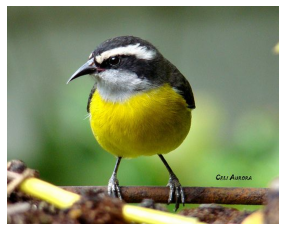

caracteristicas-cavalos-saudaveis-artigos-cursos-cpt.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: horse


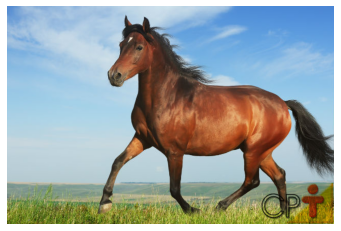

como-alimentar-um-filhote-de-passarinho.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: bird


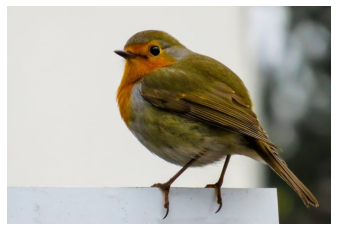

download (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: deer


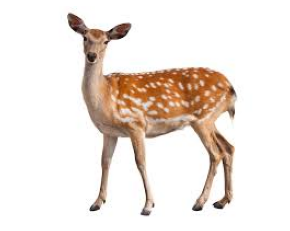

download (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: deer


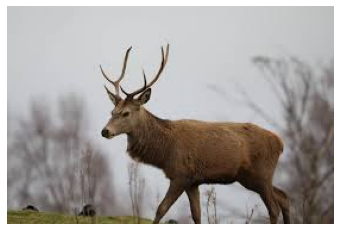

download (11).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: deer


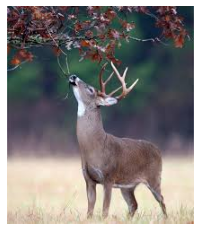

download (12).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: horse


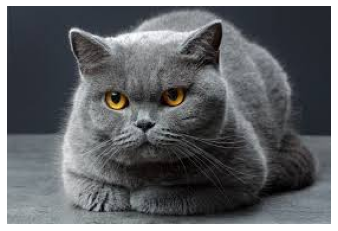

download (13).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: dog


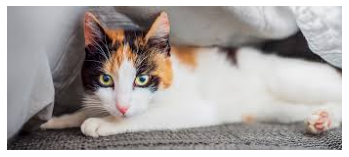

download (14).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: cat


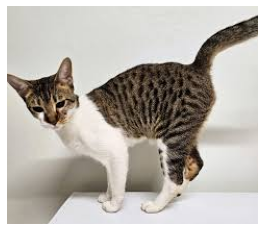

download (15).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: dog


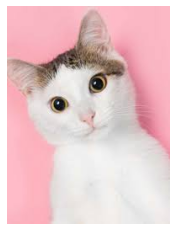

download (16).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: bird


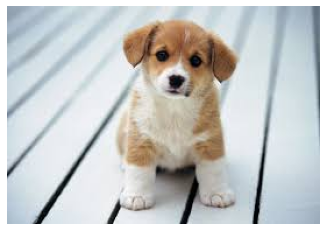

download (17).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classe prevista: cat


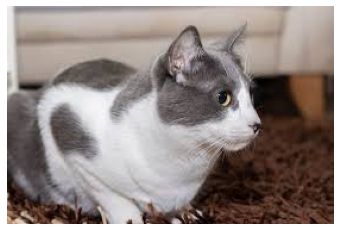

download (18).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: cat


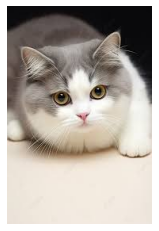

download (19).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: horse


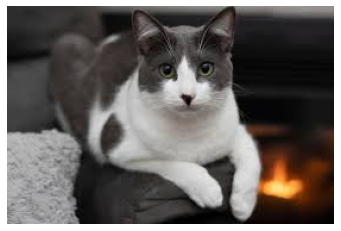

download (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: bird


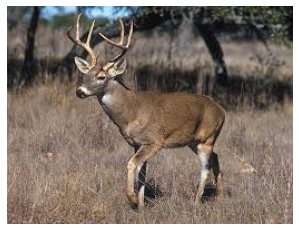

download (3).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: deer


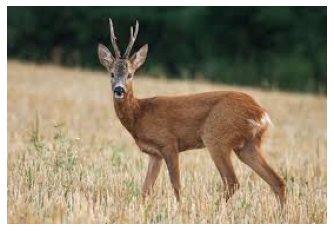

download (4).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classe prevista: deer


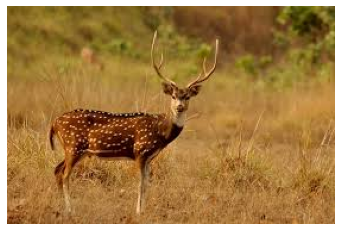

download (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: cat


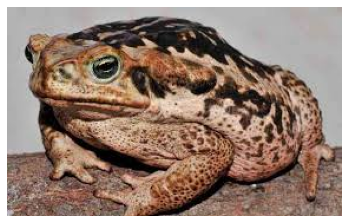

download (6).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: bird


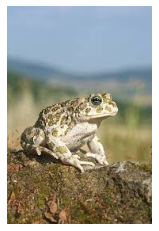

download (7).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: frog


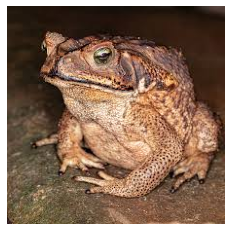

download (8).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: frog


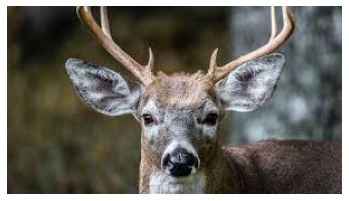

download (9).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: deer


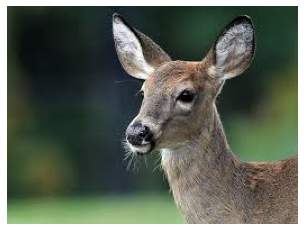

download.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Classe prevista: cat


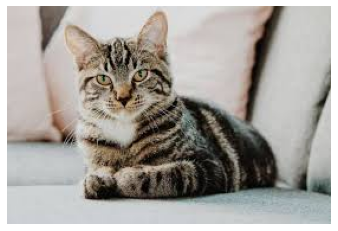

images (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classe prevista: horse


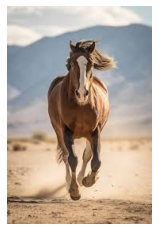

images (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: horse


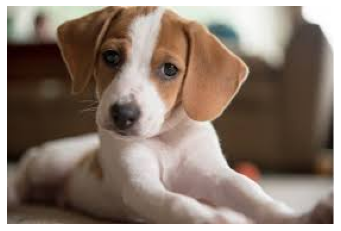

images (11).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: cat


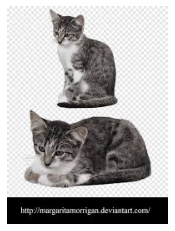

images (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: cat


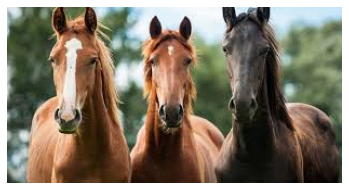

images (3).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: horse


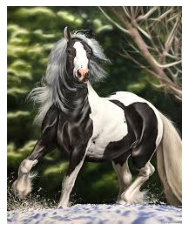

images (4).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: horse


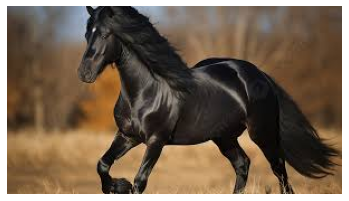

images (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classe prevista: dog


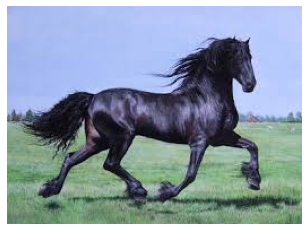

images (6).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classe prevista: bird


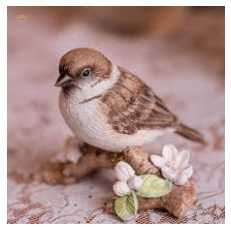

images (7).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Classe prevista: bird


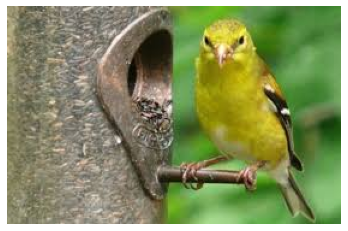

images (8).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Classe prevista: frog


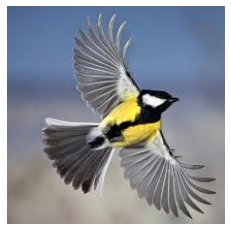

images (9).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Classe prevista: bird


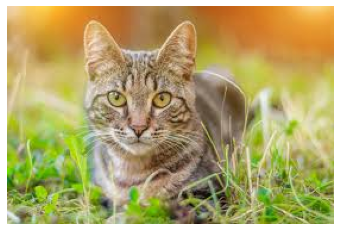

images.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Classe prevista: bird


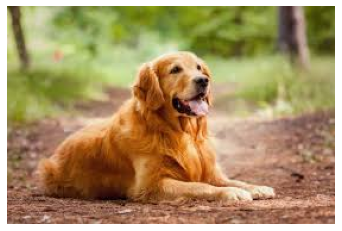

In [31]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  
    
    img = img / 255.0
    
    img = np.expand_dims(img, axis=0)
    
    return img

def display_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

def predict_image(image_path):
    img = preprocess_image(image_path)
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = ['bird', 'cat', 'deer', 'dog', 'frog', 'horse']
    print(f'Classe prevista: {class_labels[predicted_class]}')
    display_image(image_path)


import os

diretorio = r'C:\Users\LAB\Downloads\teste'

lista_arquivos = os.listdir(diretorio)

for arquivo in lista_arquivos:
    if '.jpg' in arquivo or 'jpeg' in arquivo:
        print(arquivo)
        image_path = 'C:/Users/LAB/Downloads/teste/' + arquivo 
        predict_image(image_path)
